In [1]:
from ete3 import Tree
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from simulate import simulate_shapes
from bridge_sampling.helper_functions import get_flat_values_sim


In [2]:
# load phylogeny 
tree = Tree('data/chazot_subtree_rounded.nw')
print(tree)
# load root shape for simulation 
root = np.genfromtxt('data/hercules_forewing_n=20.csv', delimiter=',')


      /-niepelti
   /-|
  |   \-theseus
--|
  |   /-hercules
   \-|
     |   /-amphitryon
      \-|
         \-telemachus


In [3]:
leafidx = []
inneridx = []
species = []
i = 0
for node in tree.traverse('levelorder'):
    if node.is_leaf():
        print(node.name)
        leafidx.append(i)
        species.append(node.name)
    else:
        inneridx.append(i)
    i+=1
print(leafidx)
print(inneridx)
print(species)

niepelti
theseus
hercules
amphitryon
telemachus
[3, 4, 5, 7, 8]
[0, 1, 2, 6]
['niepelti', 'theseus', 'hercules', 'amphitryon', 'telemachus']


In [4]:
ds = 10 #np.random.randint(0, 2**32)
sigma = 0.5
alpha = 0.05
dt = 0.1
simtree = simulate_shapes(ds=ds, dt=dt, sigma=sigma, alpha=alpha, root=root, tree=tree)
flat_true_tree = np.array(get_flat_values_sim(simtree)) 
#np.savetxt('comparison/flat_true_tree.csv', flat_true_tree, delimiter=",")

[[<matplotlib.lines.Line2D at 0x14ce4ee90>],

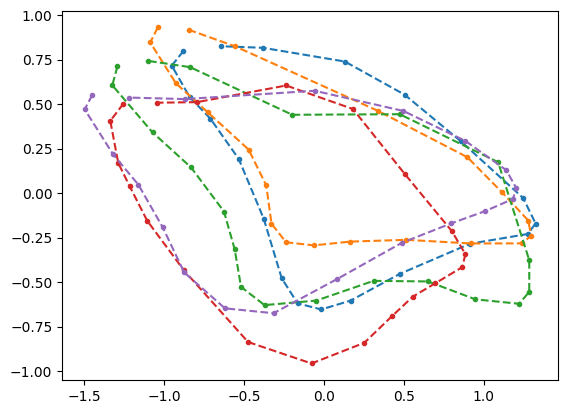

In [5]:
# show leaves 
[plt.plot(flat_true_tree[idx][0::2], flat_true_tree[idx][1::2], '--o', markersize=3, label='Simulated data') for idx in leafidx]

In [11]:
leaves = pd.DataFrame(flat_true_tree[leafidx, :], index=species)
#leaves.columns = [['X'+str(i), 'Y'+str(i)] for i in range(leaves.shape[1] // 2)]
leaves.columns = [f'X{i}' if j % 2 == 0 else f'Y{i}' 
                  for i in range(leaves.shape[1] // 2) for j in range(2)]
print(leaves)
path = f'comparison/seed={ds}_sigma={sigma}_alpha={alpha}_dt={dt}'
os.makedirs(path, exist_ok=True)
leaves.to_csv(f'{path}/leaves.csv')
flat_true_tree_df = pd.DataFrame(flat_true_tree)
flat_true_tree_df.to_csv(f'{path}/flat_true_tree.csv', index=False)

                  X0        Y0        X1        Y1        X2        Y2  \
niepelti   -0.880168  0.800131 -0.953291  0.717752 -0.840728  0.540108   
theseus    -1.040921  0.932367 -1.087932  0.848178 -0.927591  0.618544   
hercules   -1.293308  0.713819 -1.325472  0.607246 -1.073308  0.341960   
amphitryon -1.255516  0.504247 -1.338081  0.407096 -1.288036  0.169430   
telemachus -1.450755  0.553192 -1.498608  0.471936 -1.320435  0.218748   

                  X3        Y3        X4        Y4  ...       X15       Y15  \
niepelti   -0.711918  0.419950 -0.534040  0.192941  ...  0.855328  0.292841   
theseus    -0.728473  0.455698 -0.471969  0.245350  ...  1.113598  0.005522   
hercules   -0.832454  0.145294 -0.626213 -0.103293  ...  1.089511  0.174758   
amphitryon -1.216385  0.038617 -1.107389 -0.154194  ...  0.505053  0.108584   
telemachus -1.162241  0.048182 -1.009455 -0.192253  ...  0.885072  0.294018   

                 X16       Y16       X17       Y17       X18       Y18  \
niepel